# Instituto de Ciências Matemáticas e de Computação - USP
## MBA em Ciência de Dados - Gestão de Projetos


**Professor:** Dr. Francisco Louzada

**Tutor:** Jadson Oliveira

## Problema:
### Uma determinada empresa gostaria de evoluir sua estratégia de marketing através da criação de projetos personalizados à grupos de pessoas específicas. 

**Projetos como:**
  - Entendimento e conhecimento das características de grupos de consumidores específicos, associando à satisfação destes na utilização de produtos da empresa;
  - Criação de estratégias de vendas para grupos de consumidores específicos;
  - Avaliação do leque de estoque disponível para grupos de consumidores alvos.

### Etapas do Projeto:
1. Entendimento do Negócio (Definição do Problema);
2. Entendimento dos Dados;
3. Preparação dos Dados;
4. Treinamento (Modelagem);
5. Avaliação;
6. Deployment.

---



----
----

# **Workflow da metodologia CRISP-DS**

----
<br>

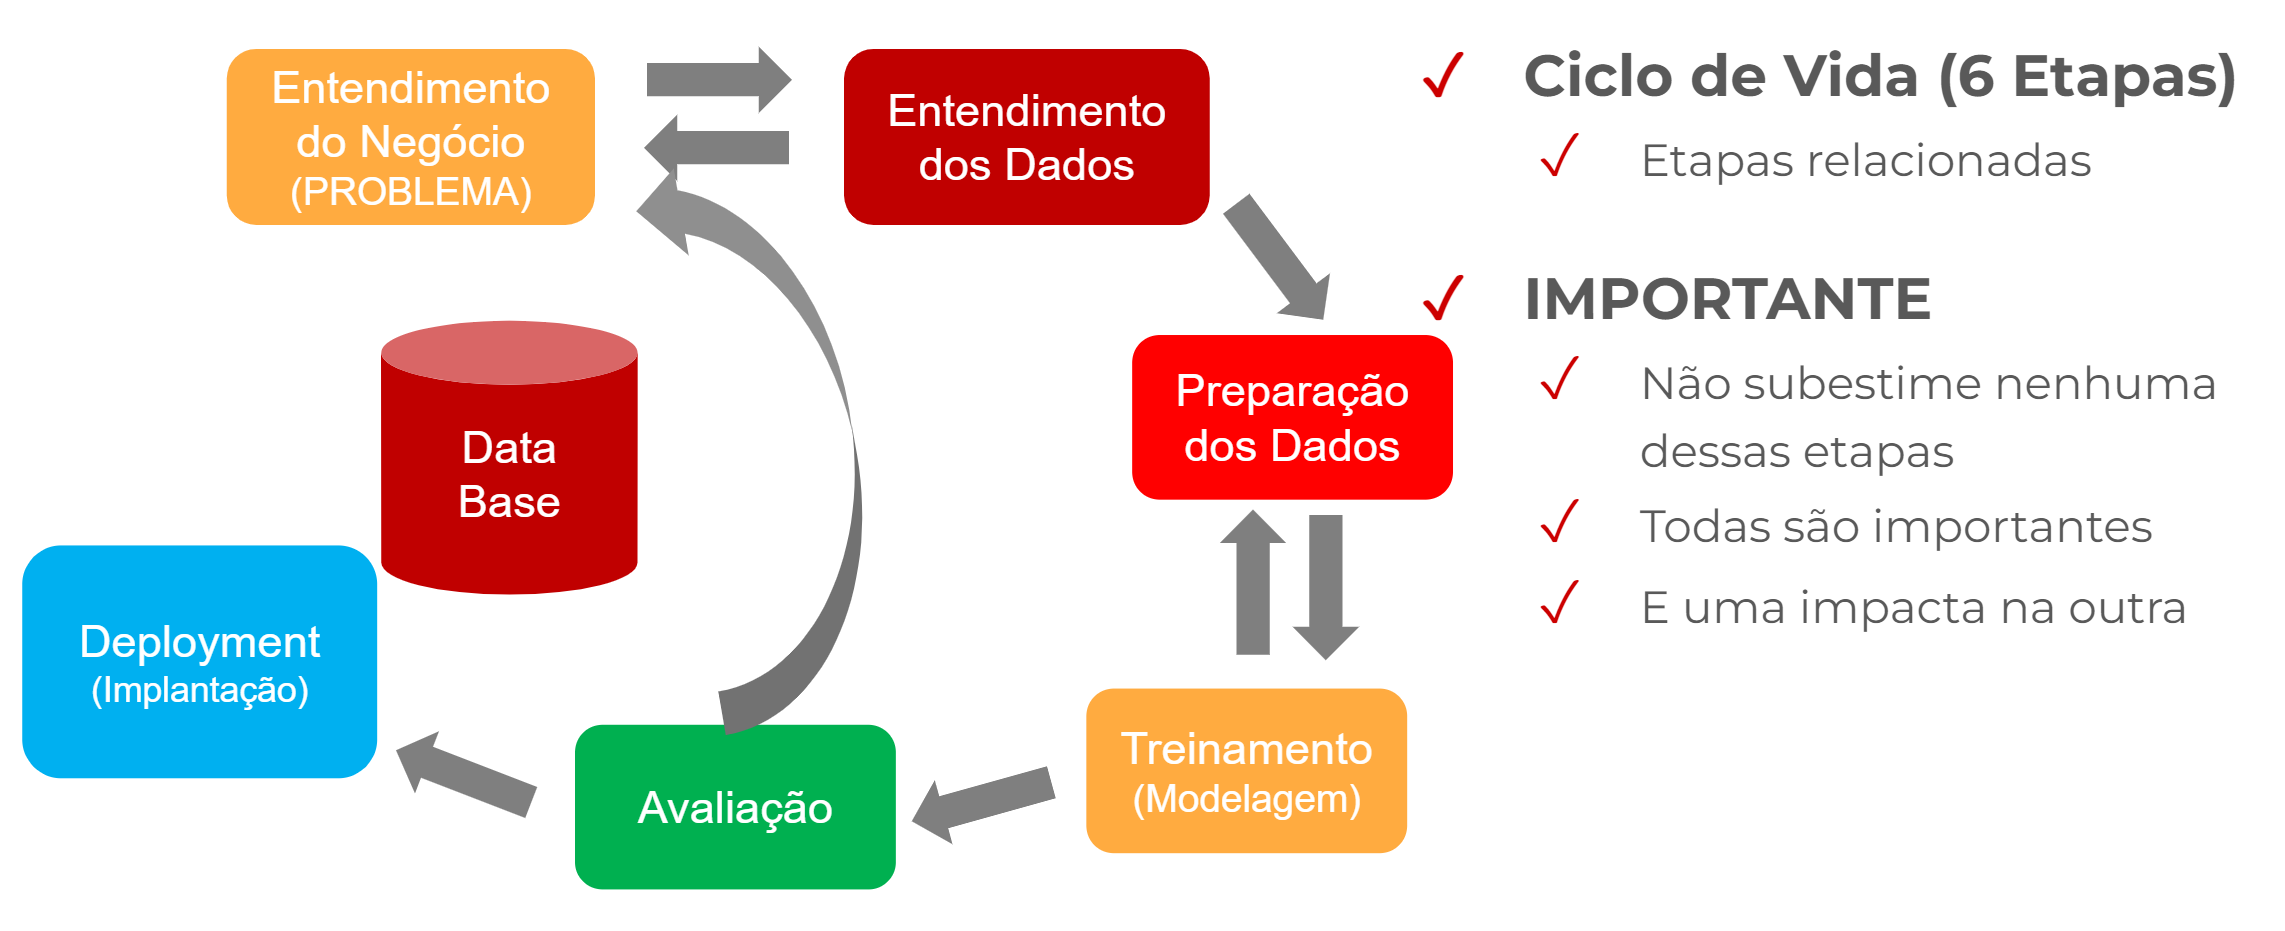

---
---

# **1 - ENTENDIMENTO DO NEGÓCIO (DEFINIÇÃO DO PROBLEMA)**

---
---

## **OBJETIVO: Transformar um problema de negócio em um problema de dados**

---

</br>

### **TAREFAS**

</br>

#### 1.1 - Compreender a necessidade da estratégia de marketing a ser explorada

#### 1.2 - Transformar a segmentação de clientes em um problema de agrupamento

#### 1.3 - Formular perguntas que façam sentido ao problema

## 1.1 - Compreender a necessidade da estratégia de marketing a ser explorada

A segmentação de clientes consiste na subdivisão de um mercado em grupos distintos de clientes que compartilham de características semelhantes. Esta estratégia pode ser um meio poderoso para identificar necessidades de clientes insatisfeitos, e por consequência a empresa pode criar vantagens sobre a concorrência através do desenvolvimento de novos produtos e serviços que sejam mais atraentes ao grupo de clientes.

O problema apontado aqui é: A empresa que requisitou seus serviços gostaria de realizar tal estudo com o objetivo de melhorar o entendimento de sua carteira de clientes e direcionar o marketing e divulgação de produtos e serviços para grupos específicos de pessoas. Essa empresa possui um serviço de cartão fidelidade, onde possui alguns dados básicos sobre seus clientes, como: identificador do cliente, idade, sexo, renda anual, e escore de gastos.

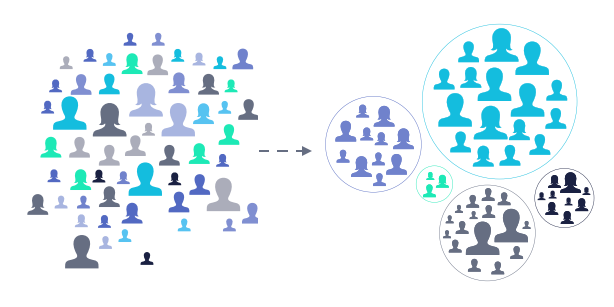

## 1.2 - Transformar a segmentação de clientes em um problema de agrupamento

**Definindo o problema**

*Neste desafio, propomos a criação de grupos de consumidores com características similares, para prover insumos ao time de marketing da empresa fictícia, possibilitanto a criação de estratégias mais acertivas para vendas direcionadas.*

Em particular, vamos aplicar ferramentas de aprendizado de máquina, mais específicamente, estratégias de agrupamento/clustering, para a criação de grupos com diferentes consumidores.

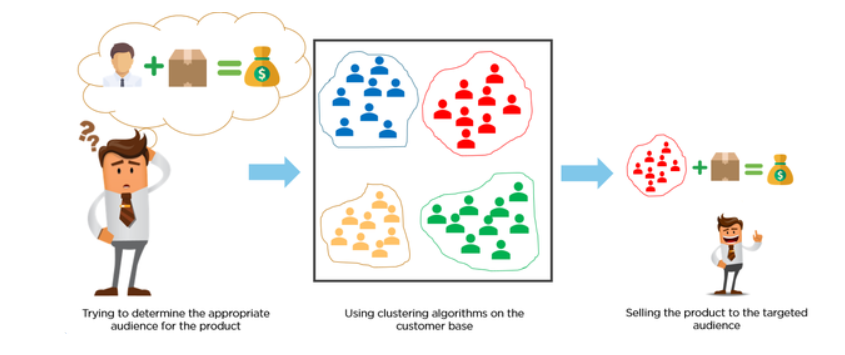

## 1.3 - Formular perguntas que façam sentido ao problema

Antes de começar a análise, é uma boa prática formular perguntas sobre o problema, para limitar a quantidade de caminhos possíveis na análise, deixando o procedimento mais objetivo. Mais quais serão as perguntas mais relevantes?

*Elas precisam fazer sentido para o problema. Não existe receita de bolo. Por exemplo*:


- Qual a idade do público que tem maior presença na loja fictícia?
- Qual a renda anual do público que tem maior presença na loja fictícia?
- Qual o sexo do público que tem maior presença na loja fictícia?
- Qual o escore de gastos do público que tem maior presença na loja fictícia?
- Quem tem maior escore de gastos na loja fictícia, pessoas do sexo masculino ou feminino?
- Quem tem maior renda anual, pessoas do sexo masculino ou feminino?
- Como está distribuído a faixa de idade da bagatela de consumidores em relação à suas rendas anuais?
- Como está distribuído a faixa de escore de gastos em relação à suas rendas anuais e idade?


---
---

# **2 - ENTENDIMENTO DOS DADOS**

---

### **OBJETIVO: Coletar e fazer uma análise exploratória dos dados visando encontrar padrões que possam direcionar o uso de estratégias específicas de agrupamento, ou mesmo o tratamento específico de dados.**

---

</br>

### **TAREFAS**

</br>

#### 2.1 - Coleta dos dados 

#### 2.2 - Dicionário e estrutura do conjunto de dados

#### 2.3 - Análise descritiva das variáveis que compõem o conjunto de dados

#### 2.4 - Análise de iteração entre as variáveis 



## 2.1 - Coleta dos dados

Para este desafio, utilizaremos um conjunto de dados bem conhecido, chamado de **Shopping Mall Dataset**, e que está disponível na plataforma [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python).

O dataset é composto por informações de **200 consumidores** e não existe rótulo/target que possa identificar grupos previamente criados.


## 2.2 - Dicionário e estrutura do conjunto de dados

Nesse banco de dados, existem 5 variáveis, nas quais são:

- **CustomerID**: Número de identificação do cliente/consumidor
- **Gender**: Identifica o gênero do cliente/consumidor
    - Male = Masculino
    - Female = Feminino
- **Age:** Representa a idade do cliente/consumidor
- **Annual Income (k$):** Representa a renda anual na casa de milhares de dólares
- **Spending Score (1-100)** Representa o escore designado pela empresa baseado no comportamento de gastos do cliente/consumidor

### **Tipos das Variáveis**

- Variáveis Numéricas
    - Discretas
        - Spending Score (1-100)
- Contínuas
    - Annual Income (k$)
    - Idade
- Chave Primária
    - CustomerID
- Variáveis Categóricas
    - Gender

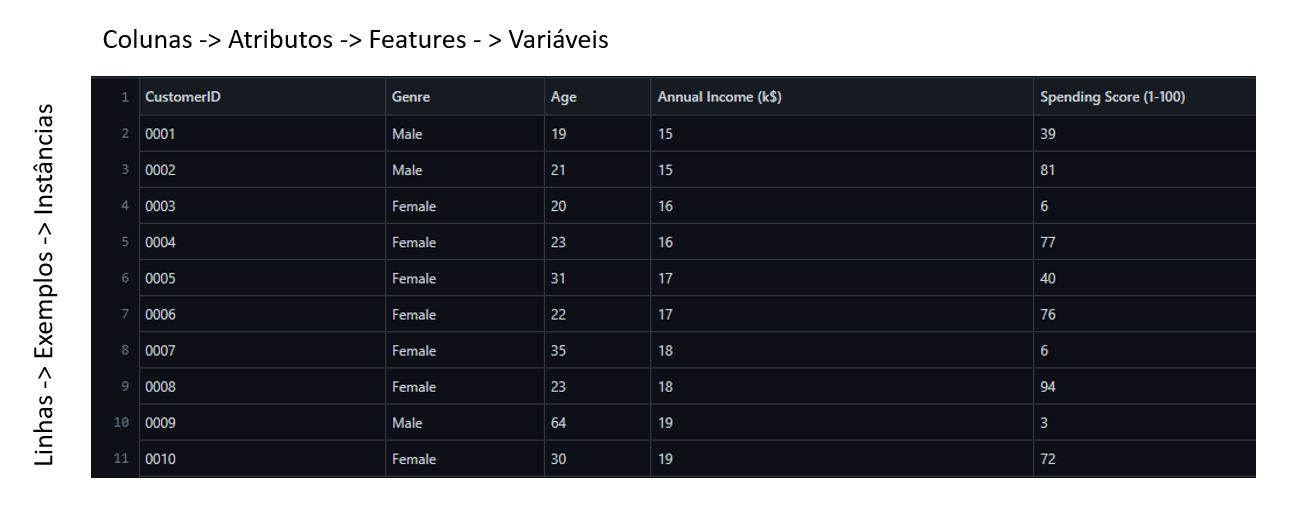

In [ ]:
import pandas as pd              
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2.3 - Análise descritiva das variáveis que compõem o conjunto de dados

In [ ]:
# Lendo o conjunto de dados
dados = pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")


#verificando as dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{dados.shape[1]} \nObservações: \t{dados.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	5 
Observações: 	200



In [ ]:
#identificando os tipos de cada variável
display(dados.dtypes)

#5 primeiras entradas do conjunto de treino
dados.head()

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# porcentagem de valores ausentes

dados.isnull().mean().sort_values(ascending=False)

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [ ]:
# Estatísticas do conjunto de dados para variáveis numéricas
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Estatísticas do conjunto de dados para variáveis categóricas
dados.describe(include=['O'])

,Genre
count,200
unique,2
top,Female
freq,112


In [ ]:
# Renomeando as colunas do dataframe
print(f'Antes de renomear as colunas: {dados.columns}')
dados.columns = ['CustomerID', 'Genre', 'Age', 'AnnualIncome', 'SpendingScore']
print(f'Depois de renomear as colunas: {dados.columns}')

# Renomeando as categorias das variáveis qualitativas
dados['Genre'] = dados['Genre'].map({'Male': 'Masculino',  
                                 'Female': 'Feminino'})

Antes de renomear as colunas: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Depois de renomear as colunas: Index(['CustomerID', 'Genre', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


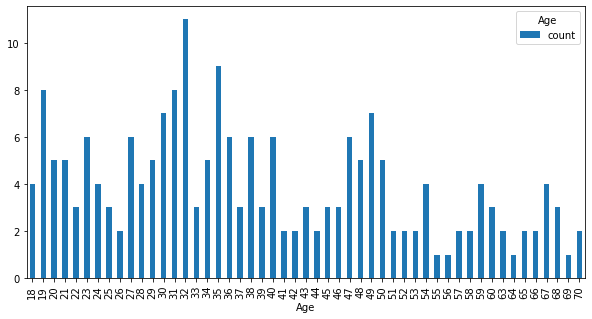

In [ ]:
# ------------------
# Age
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['Age'],
                  columns='count')

# Gráfico de Barras
plt.rcParams["figure.figsize"] = (10, 5)
tab.plot.bar()
plt.legend(title='Age')

plt.show()

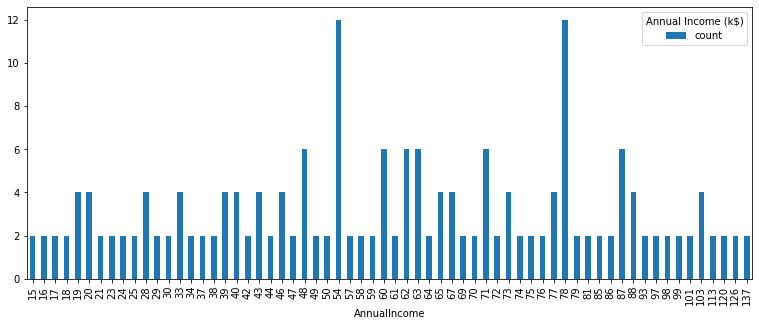

In [ ]:
# ------------------
# Annual Income (k$)
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['AnnualIncome'],
                  columns='count')

# Gráfico de Barras
plt.rcParams["figure.figsize"] = (13, 5)
tab.plot.bar()
plt.legend(title='Annual Income (k$)')

plt.show()

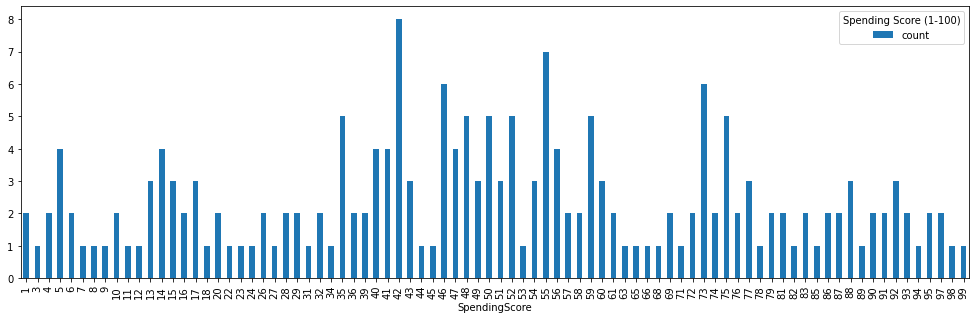

In [ ]:
# ------------------
# Spending Score (1-100)
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['SpendingScore'],
                  columns='count')

# Gráfico de Barras
plt.rcParams["figure.figsize"] = (17, 5)
tab.plot.bar()
plt.legend(title='Spending Score (1-100)')

plt.show()

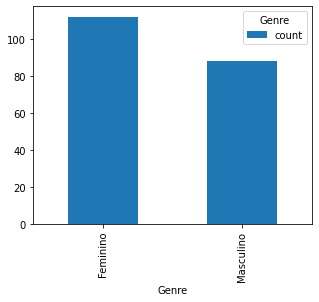

In [ ]:
# ------------------
# Genre
# ------------------

# Tabela de frequências absolutas
tab = pd.crosstab(index=dados['Genre'],
                  columns='count')

# Gráfico de Barras
plt.rcParams["figure.figsize"] = (5, 4)
tab.plot.bar()
plt.legend(title='Genre')
plt.show()

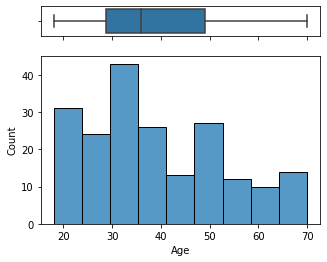

In [ ]:
# ------------------
# Age
# ------------------


# Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['Age'], ax=ax_box)
sns.histplot(data=dados, x="Age", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

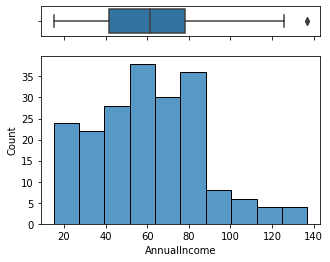

In [ ]:
# ------------------
# Annual Income (k$)
# ------------------


# Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['AnnualIncome'], ax=ax_box)
sns.histplot(data=dados, x="AnnualIncome", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

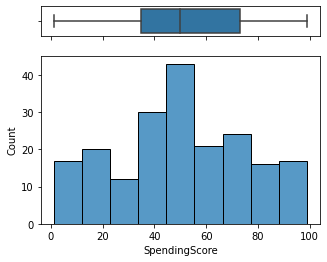

In [ ]:
# ------------------
# Spending Score (1-100)
# ------------------


# Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
 
# Criando uma figura composta por boxplot e histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Inserindo cada figura em sua posição
sns.boxplot(dados['SpendingScore'], ax=ax_box)
sns.histplot(data=dados, x="SpendingScore", ax=ax_hist)
 
# Remove os axes do boxplot
ax_box.set(xlabel='')
plt.rcParams["figure.figsize"] = (5, 4)
plt.show()

## 2.4 - Análise de iteração entre as variáveis

### Análise de correlação entre as variáveis numéricas do conjunto de dados

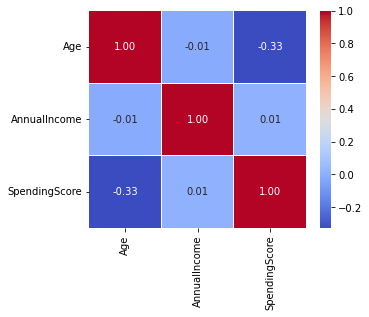

In [ ]:
# Variáveis
quantitativas = ['Age', 'AnnualIncome', 'SpendingScore']

# plotar o heatmap para variáveis numéricas
sns.heatmap(dados[quantitativas].corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)
plt.rcParams["figure.figsize"] = (5, 4)

### Análise de distribuição entre as variáveis `Genre` e `SpendingScore` do conjunto de dados

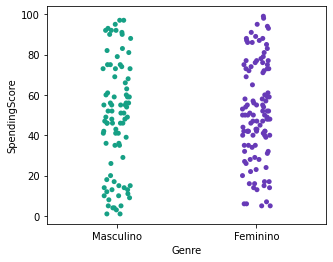

In [ ]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.stripplot(data=dados,x='Genre',y='SpendingScore',palette=['#16A085','#673AB7']);

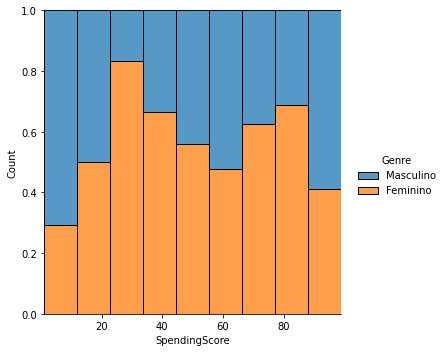

In [ ]:
sns.displot(data=dados, x="SpendingScore", hue="Genre", multiple="fill")

### Análise de distribuição entre as variáveis `Genre` e `AnnualIncome` do conjunto de dados

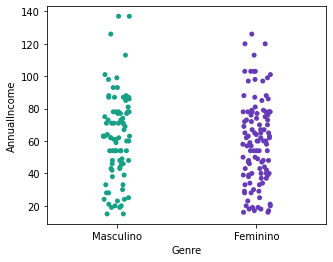

In [ ]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.stripplot(data=dados,x='Genre',y='AnnualIncome',palette=['#16A085','#673AB7']);

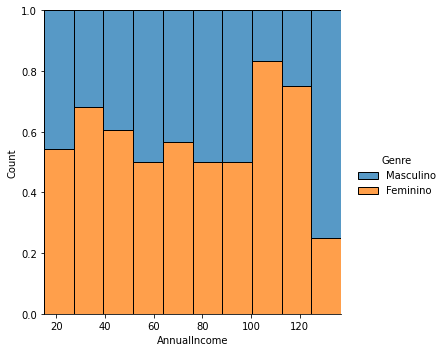

In [ ]:
sns.displot(data=dados, x="AnnualIncome", hue="Genre", multiple="fill")

### Análise de distribuição entre as variáveis `Genre` e `Age` do conjunto de dados

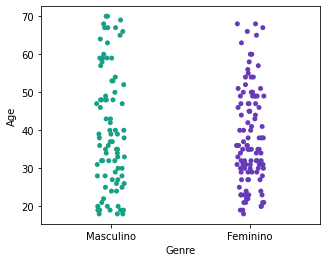

In [ ]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.stripplot(data=dados,x='Genre',y='Age',palette=['#16A085','#673AB7']);

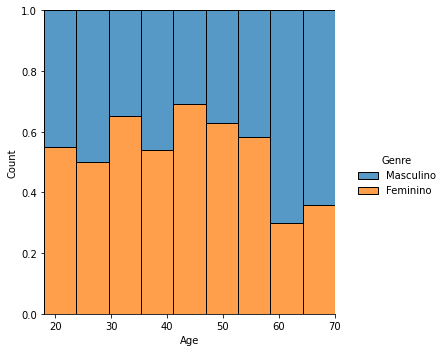

In [ ]:
sns.displot(data=dados, x="Age", hue="Genre", multiple="fill")

## Análise de dispersão entre as variáveis `Spending Score`, `Annual Income`, e `Genre` do conjunto de dados

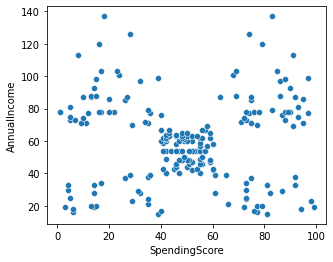

In [ ]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='SpendingScore', y='AnnualIncome');

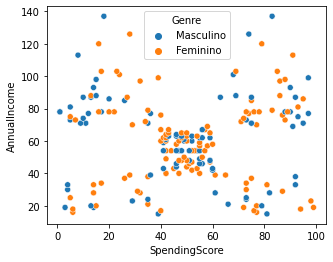

In [ ]:
# Visualização através do atributo `Genre`
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='SpendingScore', y='AnnualIncome', hue='Genre');

### Análise de dispersão entre as variáveis `Spending Score`, `Age`, e `Genre` do conjunto de dados

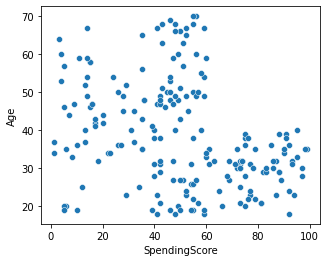

In [ ]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='SpendingScore', y='Age');

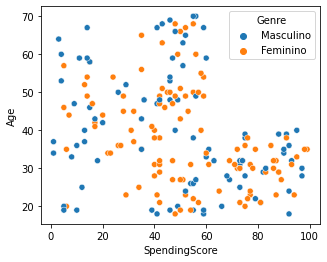

In [ ]:
# Visualização através do atributo `Genre`
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='SpendingScore', y='Age', hue='Genre');

### Análise de dispersão entre as variáveis `Annual Incomming` e `Age` do conjunto de dados

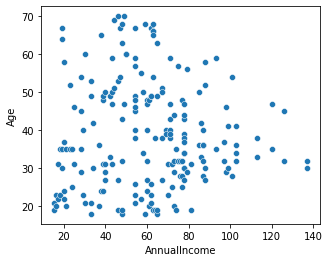

In [ ]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='AnnualIncome', y='Age');

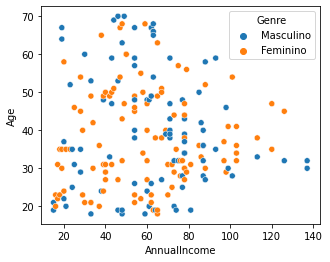

In [ ]:
# Visualização através do atributo `Genre`
plt.rcParams["figure.figsize"] = (5, 4)
sns.scatterplot(data=dados, x='AnnualIncome', y='Age', hue='Genre');

### Pairplot entre variáveis de interesse

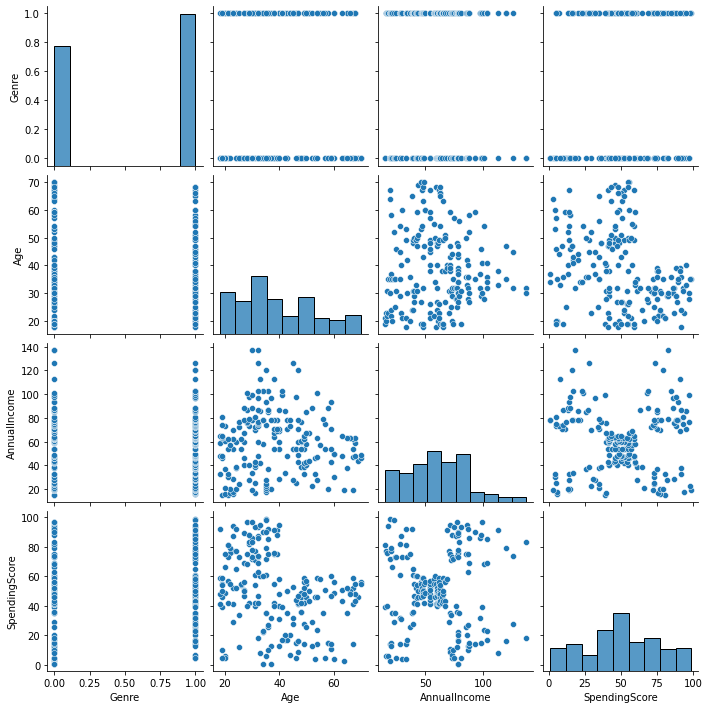

In [ ]:
# Variáveis de interesse
df = dados.copy(deep=True)
df.drop(['CustomerID'], axis=1, inplace=True)

# Codificando as variáveis categoricas para valores numéricos
df['Genre'] = df['Genre'].map({'Masculino':0,  
                           'Feminino':1})

sns.pairplot(df)

### Pairplot entre variáveis de interesse - Com divisão entre a variável `Genre`

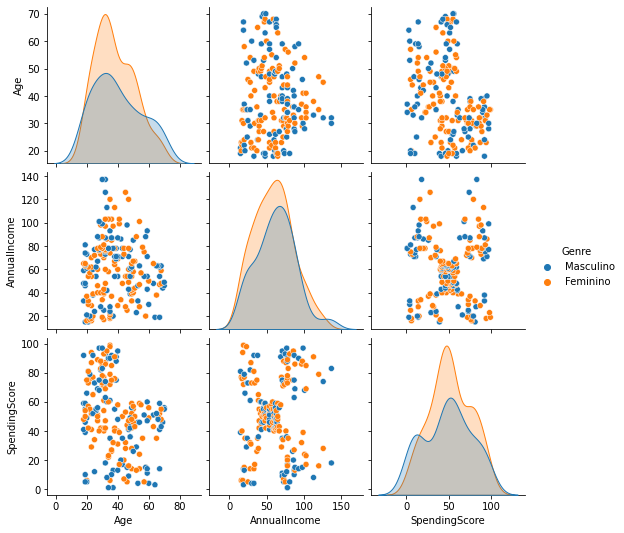

In [ ]:
# Variáveis de interesse
df = dados.copy(deep=True)
df.drop(['CustomerID', ], axis=1, inplace=True)

sns.pairplot(df, 'Genre')

## Respostas para as perguntas iniciais
- Qual a idade do público que tem maior presença na loja fictícia?
  - **Entre 30 e 35 anos**
- Qual a renda anual do público que tem maior presença na loja fictícia?
  - **Entre 55 e 60 anos**
- Qual o gênero do público que tem maior presença na loja fictícia?
  - **Feminino**
- Qual o escore de gastos do público que tem maior presença na loja fictícia?
  - **Entre 40 e 45**
- Quem tem maior escore de gastos na loja fictícia, pessoas do sexo masculino ou feminino?
  - **Público feminino**
- Quem tem maior renda anual, pessoas do sexo masculino ou feminino?
  - **Público feminino**
- Como está distribuído a faixa de idade do conjunto de consumidores em relação à suas rendas anuais?
  - **Pessoas com idade entre 30 e 50 anos tem maior renda anual, porém são poucas pessoas**
- Como está distribuído a faixa de escore de gastos em relação à suas rendas anuais e gênero?
  - **O gênero, aparentemente, não tem grandes influências na distribuição de valores de rendas anuais e gastos**

---
---

# **3 - PREPARAÇÃO DOS DADOS**

---

## **OBJETIVO: Preparar o conjunto de dados para aplicação dos modelos de aprendizado de máquina**

---

</br>

### **TAREFAS**

</br>

#### 3.1 - Tratamento de valores ausentes (se existir): remoção/substituição dos valores ausentes no conjunto de dados.

#### 3.2 - Transformação de variáveis: criar novas features, aplicar one-hot encoding nas variáveis categóricas, discretizar variáveis contínuas.



## 3.1 - Tratamento de valores ausentes (se existir): remoção/substituição dos valores ausentes no conjunto de dados.

In [ ]:
# Verificar os dados ausentes
dados.isnull().sum()

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

No caso do nosso conjunto de dados, não temos valores nulos/faltantes/ausentes, por esse motivo não há a necessidade de utilizar nenhuma metodologia específica para tratamento dessas situações. Porém, vale ressaltar que é bem comum se deparar com esses problemas em dados diversos, e existem diversas formas de tratamento de valores nulos, o ideal é aproveitar o entendimento realizado do negócio e os requisitos e características dos dados disponíveis para decidir se, deverá remover/ignorar os valores nulos ou se vai preencher esses valores de alguma forma.

Também vale destacar, que em alguns casos, podem existir valores faltantes desfarçados, onde métodos como o `isnull` não funcionará corretamente. Exemplos seriam, valores preenchidos com string vazia, ou números fora do intervalo observado para determinada variável.

## 3.2 - Transformação de variáveis: criar novas features, aplicar one-hot encoding nas variáveis categóricas, discretizar variáveis contínuas.

In [ ]:
# converter Genre em 0 e 1
dados['Genre'] = dados['Genre'].map({'Masculino': 0, 'Feminino': 1})
dados.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
# Aplicar o one-hot encoding é bem simples
dados = pd.get_dummies(dados)
dados.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
# Padronização de Valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dados)
dados = pd.DataFrame(scaler.transform(dados), columns=dados.columns)

dados.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,-1.723412,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,0.886405,-0.563369,-1.662660,-0.395980


---
---

# **4 - TREINAMENTO (MODELAGEM)**

---

## **OBJETIVO: Encontrar o modelo com melhor performance**

---

</br>

### **TAREFAS**

</br>

#### 4.1 - Treinar e comparar diferentes metodologias

## O que é clusterização?
É uma técnica dentro da Ciência de Dados que envolve o processo de agrupar objetos em diversos grupos. Em teoria, normalmente os objetos pertencentes a um mesmo grupo devem possuir características similares.


É uma técnica de **aprendizado não-supervisionado**.

### Alguns exemplos:
- Dado um conjunto de imagens diversas, gostariamos de criar grupos de imagens com características similares de cores;
- Dado um conjunto de séries temporais que representam o clima de todas as cidades do Brasil ao longo do ano, criar grupos de cidades que apresentam um clima similar;
- Dado um conjunto de documentos de um repositório, criar grupos de documentos que representam o mesmo assunto;
- Dado um conjunto de clientes de uma loja, distinguir grupos de clientes baseado em suas características de compra, com o objetivo de pensar em estratégias de negócios personalizadas aos grupos encontrados.



![Algoritmos de agrupamento na biblioteca scikit-learn](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

Imagem extraída do site oficial da biblioteca open-source Scikit-Learn: https://scikit-learn.org/stable/modules/clustering.html



**Etapas comuns para o processo de aprendizagem não supervisionada utilizando agrupamento de dados**

1. Seleção de atributos
    - devem representar a maior quantidade de informação do objeto, levando em consideração o problema a ser resolvido.
    - devem ter redundância mínima entre os atributos
2. Definição de uma medida de proximidade
    - A medida deve informar o quão **similar** ou **dissimilar** são dois objetos;
    - Todos os atributos devem contribuir de maneira igual para a medida de similaridade escolhida,  
    normalmente requer normalização dos dados
3. Definição de um critério para clusterização
    - Uma função custo ou algum tipo de regra que defina um cluster
4. Escolha de um algoritmo de agrupamento
    - Tipo particional
    - Tipo hierárquico
5. Verificação dos resultados
6. Avaliação e interpretação dos resultados

## 4.1 - Treinar e comparar diferentes metodologias

### Seleção de Features

In [ ]:
# Vamos colocar em variavel quais são nossas features que utilizaremos para o treinamento dos modelos
# No nosso caso

customer_id_feature = 'CustomerID'
features = list(dados.columns)
features.remove(customer_id_feature)

print('Features Utilizadas:', features)

Features Utilizadas: ['Genre', 'Age', 'AnnualIncome', 'SpendingScore']


In [ ]:
# Conjunto a ser utilizado para segmentação
X = dados[features].copy(deep=True)

### Criando grupos com K-Means

In [ ]:
# Importando modelo da pacote scikit-learn
from sklearn.cluster import KMeans
from sklearn import metrics

# Criando lista com todos os números de clusters que queremos testar
n_clusters = np.arange(2, 21) # Array de 1 a 10

# Criando uma lista para guardarmos os resultados
resultados_silhouette = []
resultados_harabasz = []
resultados_bouldin = []
resultados_wcss = []

# Para cada numero de clusters
for k in n_clusters:
    # Criamos um modelo novo e treinamos ele
    clf = KMeans(n_clusters=k)
    clf.fit(X)

    # Extraindo os rotulos definidos pelo modelo
    labels = clf.labels_
    
    # Calculando o valor da silhoueta
    silhouette_res = metrics.silhouette_score(X, labels, metric='euclidean')
    # Calculando o valor do indice Calinski-Harabasz
    harabasz_res = metrics.calinski_harabasz_score(X, labels)
    # Calculando o valor do indice Davies-Bouldin
    bouldin_res = metrics.davies_bouldin_score(X, labels)
    
    
    # Salvando a acurácia para o numero atual de vizinhos
    resultados_silhouette.append(silhouette_res)
    resultados_harabasz.append(harabasz_res)
    resultados_bouldin.append(bouldin_res)
    # Salvando o valor de Within-Cluster-Sum of Squared Error 
    resultados_wcss.append(clf.inertia_)

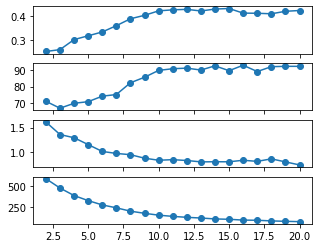

In [ ]:
fig, axs = plt.subplots(4, 1, sharex=True)
axs[0].plot(n_clusters, resultados_silhouette, '-o')
axs[1].plot(n_clusters, resultados_harabasz, '-o')
axs[2].plot(n_clusters, resultados_bouldin, '-o')
axs[3].plot(n_clusters, resultados_wcss, '-o')

Levando em consideração que, para as primeiras 2 métricas, quanto maior o valor melhor, e para as 2 últimas métricas, quanto menor o valor melhor, com **10 clusters**, obtemos um bom valor para as 4 métricas utilizadas.

In [ ]:
# Melhor K=10

# cria um modelo k-Means com melhor K
clf_kmeans = KMeans(n_clusters=10)

# treinamento do modelo
clf_kmeans.fit(X)

# rotulagem
labels_kmeans = clf_kmeans.labels_

# Calculando o valor da silhoueta
silhouette_kmeans = metrics.silhouette_score(X, labels, metric='euclidean')
# Calculando o valor do indice Calinski-Harabasz
harabasz_kmeans = metrics.calinski_harabasz_score(X, labels)
# Calculando o valor do indice Davies-Bouldin
bouldin_kmeans = metrics.davies_bouldin_score(X, labels)
# Extraindo o valor de Within-Cluster-Sum of Squared Error
wcss_kmeans = clf.inertia_

print(f'Sillhouette Score: {silhouette_kmeans}\n'\
f'Calinski-Harabasz Index: {harabasz_kmeans}\n'\
f'Davies-Bouldin Index: {bouldin_kmeans}\n'\
f'WCSS Score: {wcss_kmeans}\n')

Sillhouette Score: 0.4222695940501549
Calinski-Harabasz Index: 92.47262501365564
Davies-Bouldin Index: 0.7375225268171973
WCSS Score: 74.34253800944175



### Visualizando os dados via Dendograma

In [ ]:
# Definição de método para criação do gráfico de dendograma
def plot_dendogram(X, method):
    plt.figure(figsize=(14,5))
    dendrogram(linkage(X, method))
    plt.show(True)

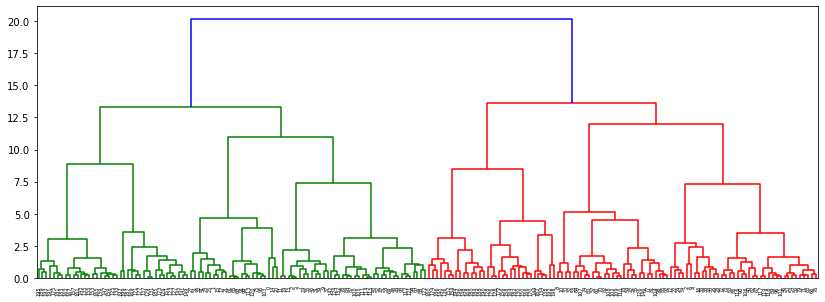

In [ ]:
plot_dendogram(X, 'ward')

---
---

# **5 - AVALIAÇÃO**

---

## **OBJETIVO: Avaliar a modelagem desenvolvida para solucionar o problema principal.**
Neste contexto, onde temos um problema não-supervisionado, um dos principais pontos de avalização está na tentativa de interpretar os resultados e sumarizar as características de cada grupo estabelecido.

---

</br>

### **TAREFAS**

</br>

#### 5.1 - Interpretar o conjunto de características de cada grupo - Abordagem Analítica

#### 5.2 - Interpretar o conjunto de características de cada grupo - Abordagem Supervisionada


## 5.1 - Interpretar o conjunto de características de cada grupo - Abordagem Analítica

Neste tipo de abordagem, é comum utilizar o próprio conjunto de dados na tentativa de agrupar os registros baseado em seus rótulos e através de análises dos dados, definir manualmente regras que possam representar cada grupo.

In [ ]:
# Criando coluna contendo o identificador do grupo pertencente a cada registro
dados_rotulados = dados.copy(deep=True)

dados_rotulados['rotulo'] = labels_kmeans

In [ ]:
df_mean = dados_rotulados.groupby('rotulo').mean()

In [ ]:
df_mean

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
rotulo,,,,,
0,-0.287124,0.886405,1.098306,-0.241583,-0.048079
1,1.233483,0.886405,0.354220,1.249122,-1.147454
2,1.049727,-1.128152,-0.027007,0.967012,-1.397168
3,-0.769329,-1.128152,-0.976027,-0.737052,0.416038
4,1.038281,-1.128152,-0.399900,1.013441,1.260407
5,-1.344831,0.742508,0.169677,-1.316409,-1.166865
6,-0.499636,-1.128152,1.435058,-0.452983,-0.401952
7,-1.346353,0.886405,-0.960846,-1.330880,1.177786
8,-0.140298,0.886405,-0.781539,-0.122142,-0.119570


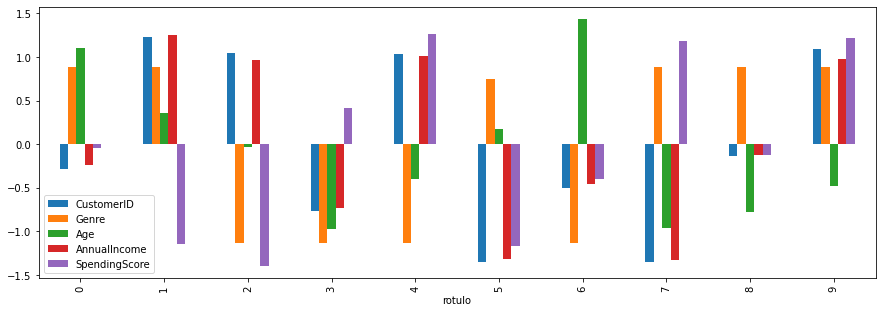

In [ ]:
plt.rcParams["figure.figsize"] = (15, 5)
df_mean.plot.bar()

## 5.2 - Interpretar o conjunto de características de cada grupo - Abordagem Supervisionada

Neste tipo de abordagem, utiliza-se algoritmos como as árvores de decisões para tornar o processo de interpretação de cada cluster mais automatizado e com melhor visualização.

Para isso é necessário treinar um modelo supervisionado (ex., uma árvore de decisão) e extrair regras a partir do modelo ajustado.

In [ ]:
# Importando o classificador
from sklearn.tree import DecisionTreeClassifier

# cria uma decision tree
clf_tree = DecisionTreeClassifier(max_depth=3)

# ajuste do modelo sob os dados rotulados
clf_tree.fit(X, labels_kmeans)

DecisionTreeClassifier(max_depth=3)

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=True,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

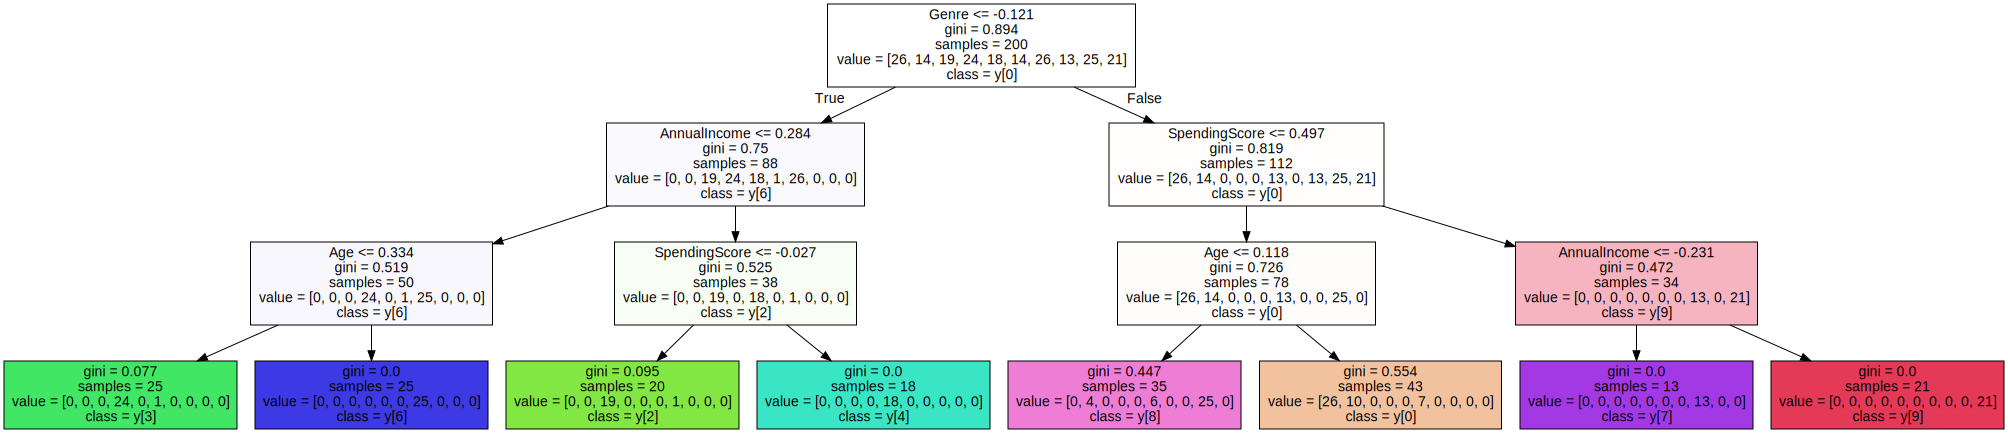

In [ ]:
graph

---
---

# **6 - DEPLOYMENT**

---

Para o deployment do modelo em produção, é necessário replicar todas as etapas (pipeline), que foi utilizado no momento do desenvolvimento. Existem algumas abordagens para facilitar a extruturação desse pipeline, como o [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) da biblioteca Sklearn, que gera um modelo final composto por todas as etapas definidas na criação do pipeline.

O deployment do modelo, dependerá muito do problema de negócio que está atuando e dos requisitos da solução. Por exemplo, pode ser necessário colocar o modelo em produção a partir de um endpoint de uma API, ou mesmo passar por um processo periódico que seja responsável por atualizar tabelas de score de uma base dados.

Existem algumas bibliotecas que facilitam "salvar" o modelo e "reutilizá-lo" em outras etapas. Duas amplamente utilizadas são: [Pickle](https://docs.python.org/3/library/pickle.html) e [Joblib](https://joblib.readthedocs.io/en/latest/).

### Salvando o modelo desenvolvido

In [ ]:
import pickle

labels_antes_salvar = clf_kmeans.predict(X)

# Salvando o modelo em um arquivo
pickle.dump(clf_kmeans, open("modelo.pickle.dat", "wb"))

### Carregando o modelo desenvolvido

In [ ]:
import pickle

# Carregando o modelo do arquivo
loaded_model = pickle.load(open("modelo.pickle.dat", "rb"))

In [ ]:
labels_depois_carregar = loaded_model.predict(X)

In [ ]:
labels_antes_salvar == labels_depois_carregar

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,